<a href="https://colab.research.google.com/github/FutureOfTed/AI-class/blob/main/Week9/LSTM_Alcohol_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [31]:
# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/data/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [32]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [33]:
# 3. 데이터셋 생성 함수 정의
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

In [34]:
# 3-1. 시퀀스 생성 (window_6)
window_6 = 6
X_6, y_6 = create_sequences(data, window_6)

# 3-2. 시퀀스 생성 (window_12)
window_12 = 12
X_12, y_12 = create_sequences(data, window_12)

In [35]:
# 4. train/test 데이터 분리
# 전체 데이터의 80%를 훈련 데이터로 사용
train_size_6 = int(len(X_6) * 0.8)
X_train_6, X_test_6 = X_6[:train_size_6], X_6[train_size_6:]
y_train_6, y_test_6 = y_6[:train_size_6], y_6[train_size_6:]

train_size_12 = int(len(X_12) * 0.8)
X_train_12, X_test_12 = X_12[:train_size_12], X_12[train_size_12:]
y_train_12, y_test_12 = y_12[:train_size_12], y_12[train_size_12:]

In [36]:
# 5. LSTM 모델 정의
# 5-1. LSTM 모델 (윈도우 사이즈 6)
tf.keras.backend.clear_session()
model_6 = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window_6, 1)),
    tf.keras.layers.Dense(1)
])
model_6.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
# 5-2. LSTM 모델 (윈도우 사이즈 12)
tf.keras.backend.clear_session()
model_12 = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window_12, 1)),
    tf.keras.layers.Dense(1)
])
model_12.compile(optimizer='adam', loss='mse')

In [38]:
# 6-1. 모델(윈도우 사이즈 6) 훈련 및 History 저장
EPOCHS = 50
BATCH_SIZE = 8

print("--- model_6 훈련 시작 ---")
history_6 = model_6.fit(
    X_train_6, y_train_6,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=(X_test_6, y_test_6) # 테스트 데이터로 검증
)
print("--- model_6 훈련 완료 ---")

--- model_6 훈련 시작 ---
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0712 - val_loss: 0.0232
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - val_loss: 0.0184
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - val_loss: 0.0153
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - val_loss: 0.0158
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - val_loss: 0.0153
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - val_loss: 0.0222
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - val_loss: 0.0155
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - val_loss: 0.0152
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062 - val_loss: 0.0155
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - val_loss: 0.0154
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - val_loss: 0.0164
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

In [39]:
# 6-2. 모델(윈도우 사이즈 12) 훈련 및 History 저장
print("--- model_12 훈련 시작 ---")
history_12 = model_12.fit(
    X_train_12, y_train_12,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=(X_test_12, y_test_12) # 테스트 데이터로 검증
)
print("--- model_12 훈련 완료 ---")

--- model_12 훈련 시작 ---
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0539 - val_loss: 0.0266
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - val_loss: 0.0166
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - val_loss: 0.0145
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - val_loss: 0.0159
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0053 - val_loss: 0.0153
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0056 - val_loss: 0.0159
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0050 - val_loss: 0.0165
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0064 - val_loss: 0.0139
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - val_loss: 0.0138
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - val_loss: 0.0162
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - val_loss: 0.0145
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

In [40]:
# 7. RNN 모델 추가
tf.keras.backend.clear_session()
model_rnn_6 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(window_6, 1)),
    tf.keras.layers.Dense(1)
])
model_rnn_6.compile(optimizer='adam', loss='mse')

model_rnn_12 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(window_12, 1)),
    tf.keras.layers.Dense(1)
])
model_rnn_12.compile(optimizer='adam', loss='mse')

In [41]:
# 7-1. RNN 모델(윈도우 사이즈 6) 훈련
print("--- RNN model_6 훈련 시작 ---")
history_rnn_6 = model_rnn_6.fit(
    X_train_6, y_train_6,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test_6, y_test_6),
    verbose=1
)
print("--- RNN model_6 훈련 완료 ---")

--- RNN model_6 훈련 시작 ---
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0613 - val_loss: 0.0133
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - val_loss: 0.0136
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - val_loss: 0.0180
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - val_loss: 0.0138
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - val_loss: 0.0136
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - val_loss: 0.0126
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - val_loss: 0.0146
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047 - val_loss: 0.0140
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047 - val_loss: 0.0128
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - val_loss: 0.0141
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - val_loss: 0.0130
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

In [42]:
# 7-2. RNN 모델(윈도우 사이즈 12) 훈련
print("--- RNN model_12 훈련 시작 ---")
history_rnn_12 = model_rnn_12.fit(
    X_train_12, y_train_12,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test_12, y_test_12),
    verbose=1
)
print("--- RNN model_12 훈련 완료 ---")

--- RNN model_12 훈련 시작 ---
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0298 - val_loss: 0.0217
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 - val_loss: 0.0183
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - val_loss: 0.0110
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - val_loss: 0.0159
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - val_loss: 0.0077
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - val_loss: 0.0133
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - val_loss: 0.0073
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - val_loss: 0.0305
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - val_loss: 0.0117
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - val_loss: 0.0090
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - val_loss: 0.0055
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/s

In [46]:
# 8. RNN 예측 및 MSE 계산
pred_rnn_6 = model_rnn_6.predict(X_test_6)
pred_rnn_12 = model_rnn_12.predict(X_test_12)

mse_rnn_6 = mean_squared_error(y_test_6, pred_rnn_6)
mse_rnn_12 = mean_squared_error(y_test_12, pred_rnn_12)

print(f"RNN(window=6) MSE: {mse_rnn_6:.6f}")
print(f"RNN(window=12) MSE: {mse_rnn_12:.6f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
RNN(window=6) MSE: 0.016517
RNN(window=12) MSE: 0.004211


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


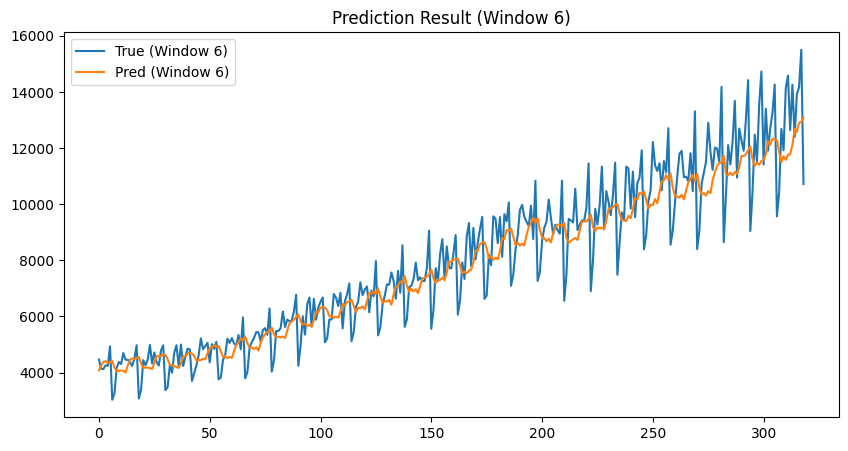

In [48]:
# 9. 예측 시각화 (선택 사항: 모델 성능 확인)
# 9-1. 예측 (윈도우 사이즈 6) - 전체 데이터셋을 사용
pred_6 = model_6.predict(X_6)
plt.figure(figsize=(10, 5))
plt.plot(scaler.inverse_transform(y_6), label='True (Window 6)')
plt.plot(scaler.inverse_transform(pred_6), label='Pred (Window 6)')
plt.title('Prediction Result (Window 6)')
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


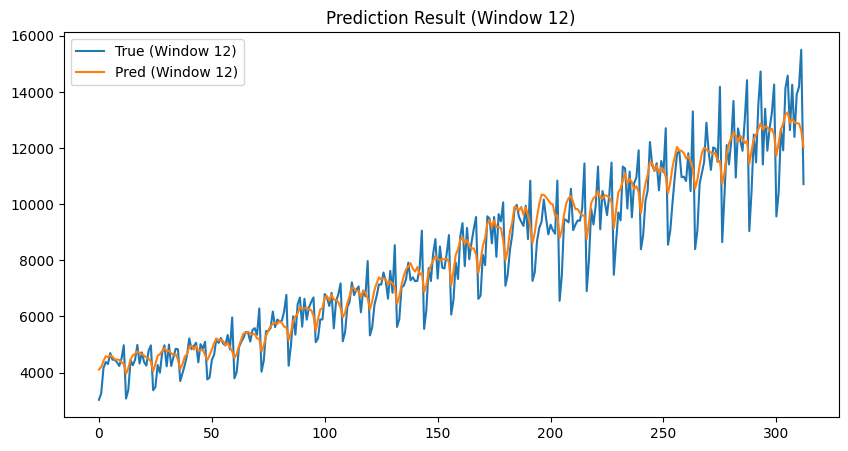

In [49]:
# 9-2. 예측 (윈도우 사이즈 12) - 전체 데이터셋을 사용
pred_12 = model_12.predict(X_12)
plt.figure(figsize=(10, 5))
plt.plot(scaler.inverse_transform(y_12), label='True (Window 12)')
plt.plot(scaler.inverse_transform(pred_12), label='Pred (Window 12)')
plt.title('Prediction Result (Window 12)')
plt.legend()
plt.show()

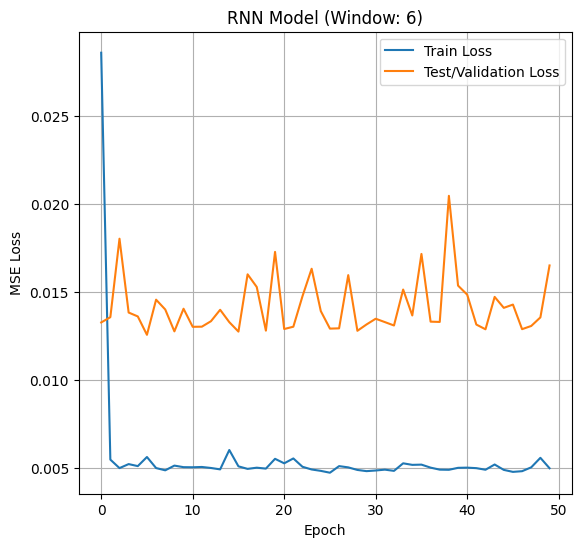

In [50]:
# 8. MSE 그래프 시각화 (Loss Curve)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history_rnn_6.history['loss'], label='Train Loss')
plt.plot(history_rnn_6.history['val_loss'], label='Test/Validation Loss')
plt.title(f'RNN Model (Window: 6)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

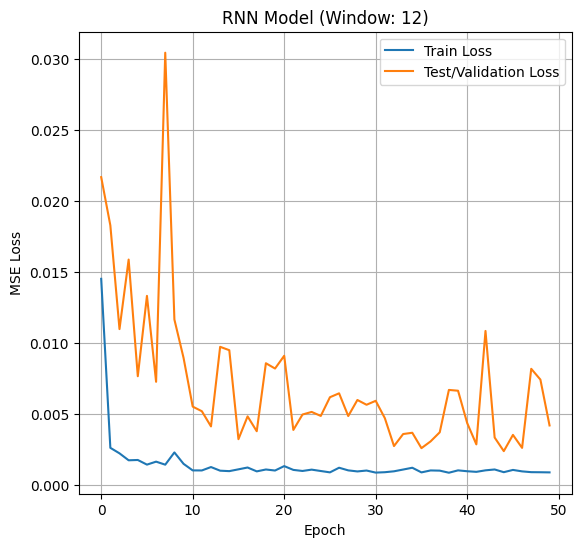

In [53]:
# 7-2. model_12 MSE 그래프
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.plot(history_rnn_12.history['loss'], label='Train Loss')
plt.plot(history_rnn_12.history['val_loss'], label='Test/Validation Loss')
plt.title(f'RNN Model (Window: 12)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()